In [285]:
import pandas as pd
import numpy as np

In [286]:
df = pd.read_csv("../personal-dev/ml/Machine-Learning-With-Python/ex1data2.txt", header = None)
df.head()

,0,1,2
0,2104,3,399900
1,1600,3,329900
2,2400,3,369000
3,1416,2,232000
4,3000,4,539900


In [287]:
df = pd.concat([pd.Series(1, index=df.index, name="00"),df],axis=1)
df.head()

,00,0,1,2
0,1,2104,3,399900
1,1,1600,3,329900
2,1,2400,3,369000
3,1,1416,2,232000
4,1,3000,4,539900


In [288]:
%matplotlib inline
import matplotlib.pyplot as plt
X = df.drop(columns=2)
y = df.iloc[:, 3]

In [289]:
for i in range(1, len(X.columns)):
    X[i-1] = X[i-1]/np.max(X[i-1])

In [290]:
theta=np.array([0]*len(X.columns))

In [291]:
m = len(df)
def hypothesis(theta, X):
    return theta*X

In [292]:
def costFunction(theta, X , y):
    y1=hypothesis(theta, X)
    y1 = np.sum(y1, axis=1)
    return sum((y1-y)**2)/(2*m)

In [293]:
def gradientDescent(theta, X, y , epoch , alpha) :
    J = [] #cost func in each iteration
    i = 0
    while i < epoch :
        y1=hypothesis(theta, X)
        y1 = np.sum(y1, axis=1)
        for c in range(0, len(X.columns)) : 
            theta[c] = theta[c] - alpha*sum((y1-y)*X.iloc[:, c]/len(X))
        cost = costFunction(theta, X, y)
        J.append(cost)
        i+=1
    return cost, J, theta

In [294]:
cost, J , theta = gradientDescent(theta, X , y , 10000, 0.05)

In [295]:
y_predict = hypothesis(theta, X)
y_predict = np.sum(y_predict, axis=1)
y_predict.head()

0    356125.727468
1    286159.430013
2    397217.045020
3    268778.778562
4    472347.656275
dtype: float64

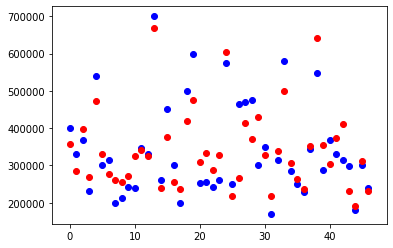

In [296]:
plt.figure()
plt.scatter(x = list(range(0, 47)),y = y,color="blue")
plt.scatter(x = list(range(0, 47)),y = y_predict,color="red")
plt.show()

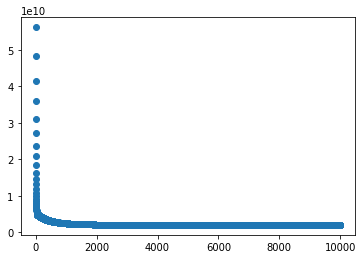

In [297]:
plt.figure()
plt.scatter(x = list(range(0,10000)), y = J)
plt.show()